<a href="https://colab.research.google.com/github/27priyanshu/ANN-using-Keras/blob/main/ANN_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !python -mpip install -U pip
 !python -mpip install -U matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 28.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [3]:
print(f"Tensorlflow Version {tf.__version__}")
#print(f"keras version {tf.keras.__version__}")

Tensorlflow Version 2.14.0


In [4]:
os.getcwd()

'/content'

# Creating a simple classifier using keras on MNIST Dataset

In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [7]:
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
x_train_full.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:

# Scale the data btw 0 to 1  by dividing it by 255. as its an unsigned data btw 0-255 range
x_valid, x_train = x_train_full[:5000]/255.,x_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = x_test/255

In [11]:
#train = 55000
#test = 10000
#val = 5000

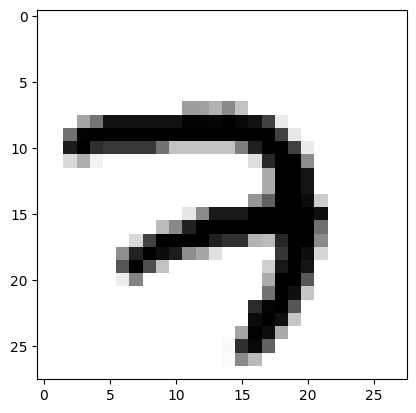

In [12]:
#lets view some data

plt.imshow(x_train[0],cmap="binary")
plt.show()

<Axes: >

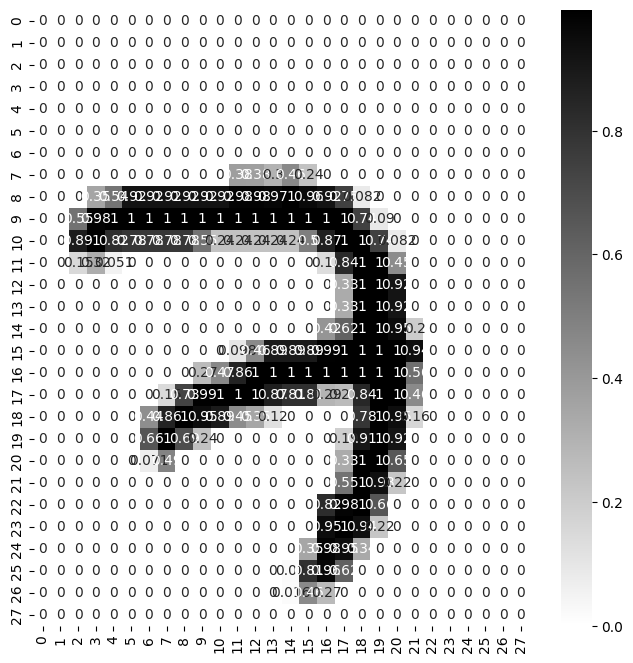

In [36]:
# how machine understand this

plt.figure(figsize=(8,8))
sns.heatmap(x_train[0],annot=True,cmap="binary")

In [14]:
28*28



784

![picture](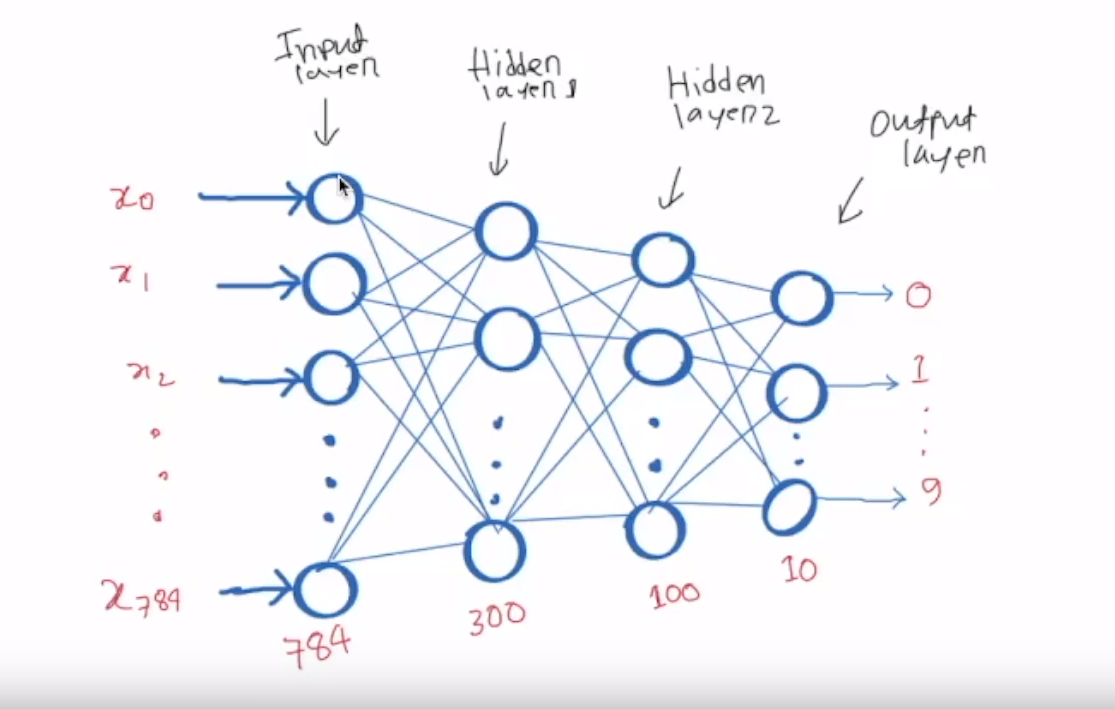https://drive.google.com/uc?id=1VxFhqfSpRsOoqmsEVf7K9Z8B5T7usF6S/view?usp=sharing)


In [15]:
#creating layers of ANN

LAYERS = [ tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayers"),
          tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
           tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
           tf.keras.layers.Dense(10,activation="Softmax",name= "outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [16]:
model_clf.layers

In [17]:
# firstlayer * secondlayer +bias
300*100+100

30100

In [18]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayers (Flatten)       (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [20]:
weights,biases=hidden1.get_weights()
#2 arrays 1) is for weights
#         2) is for bias

In [21]:
weights.shape

(784, 300)

In [22]:
print("weights\n",weights.shape)
weights

weights
 (784, 300)


array([[ 0.05343099,  0.04671749, -0.0426404 , ...,  0.02569981,
         0.01414899, -0.03431567],
       [ 0.02093757,  0.03813107,  0.06016941, ..., -0.03259747,
         0.0240799 ,  0.05986997],
       [-0.03288838, -0.06002954,  0.05338989, ...,  0.01353232,
        -0.05304211, -0.0667347 ],
       ...,
       [-0.05062921,  0.06479262,  0.01680929, ...,  0.05227487,
        -0.03680167,  0.02045286],
       [ 0.00462513, -0.07152101, -0.06858166, ...,  0.02570707,
         0.04421517,  0.02207652],
       [-0.02081328, -0.00564755,  0.07130437, ...,  0.01708826,
        -0.04315066,  0.00360213]], dtype=float32)

In [23]:

print("shape\n",biases.shape)
biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

**Now compile the model**

In [24]:
LOSS_FUNCTION = tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # Some tweeks in Gradiant Desent
METRICS = ["accuracy"]


model_clf.compile(loss= LOSS_FUNCTION,
                  optimizer = OPTIMIZER,
                  metrics = METRICS)

In [25]:
# Training

EPOCHS = 30
VALIDATION_SET = (x_valid, y_valid)

history = model_clf.fit(x_train,y_train,epochs=EPOCHS,
                        validation_data = VALIDATION_SET, batch_size = 32)

Epoch 1/30
1719/1719 [==============================] - 14s 6ms/step - loss: 0.6062 - accuracy: 0.8407 - val_loss: 0.3022 - val_accuracy: 0.9188
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2830 - accuracy: 0.9189 - val_loss: 0.2349 - val_accuracy: 0.9368
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2316 - accuracy: 0.9335 - val_loss: 0.2049 - val_accuracy: 0.9420
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1978 - accuracy: 0.9436 - val_loss: 0.1743 - val_accuracy: 0.9514
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1729 - accuracy: 0.9503 - val_loss: 0.1568 - val_accuracy: 0.9562
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1529 - accuracy: 0.9555 - val_loss: 0.1404 - val_accuracy: 0.9592
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1368 - accuracy: 0.9604 - val_loss: 0.1320 - val_accuracy

In [26]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [27]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.606228,0.840727,0.302191,0.9188
1,0.282956,0.918909,0.234867,0.9368
2,0.231611,0.933527,0.204918,0.9420
3,0.197754,0.943618,0.174292,0.9514
4,0.172863,0.950309,0.156764,0.9562
5,0.152888,0.955527,0.140370,0.9592
6,0.136810,0.960418,0.132024,0.9642
7,0.124077,0.964309,0.121920,0.9672
8,0.113007,0.968218,0.116294,0.9672
9,0.103012,0.970927,0.107236,0.9698


<Axes: >

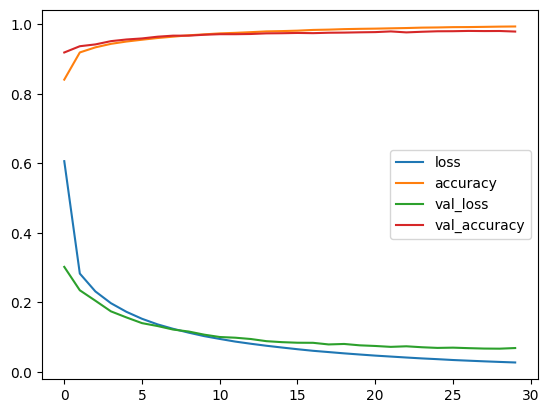

In [28]:
pd.DataFrame(history.history).plot()

In [29]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0698 - accuracy: 0.9772


[0.06982839107513428, 0.9771999716758728]

SAMPLE CHECK - TEST DATA

In [30]:
x_new = X_test[:3]

In [31]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

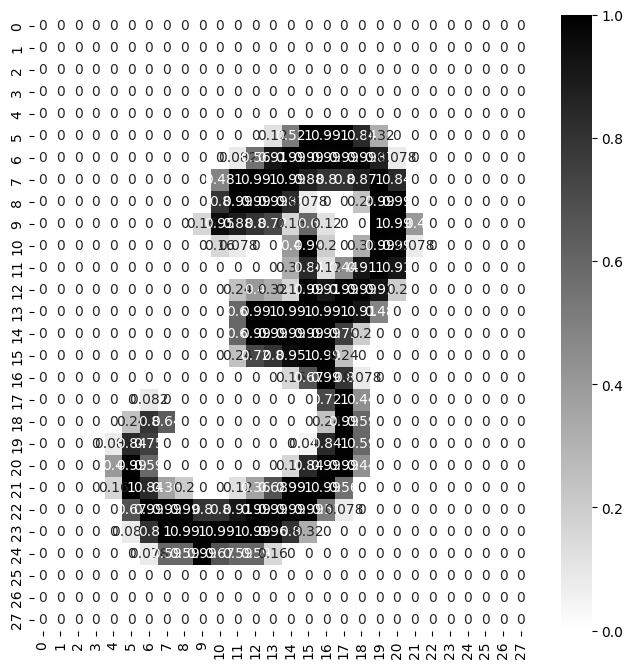

In [35]:
plt.figure(figsize=(8,8))
sns.heatmap(x_train[1],annot=True,cmap="binary")

In [33]:
y_prob=model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 108ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [37]:
y_pred = np.argmax(y_prob, axis = -1)

In [38]:
y_pred

array([7, 2, 1])

In [39]:
actual

array([7, 2, 1], dtype=uint8)